#  Procesamiento de Lenguaje Natural

### Desafío 5 - Bert Sentiment Analysis

#### Nombre: Eduardo Echeverria

### Enunciado:

Implementar un modelo de Bert Sentiment Analysis basado en el ejemplo observado en clase.

In [1]:
!pip install transformers --quiet

Por temas de compatibilidad en las librerías de Keras, utilizaremos una versión legacy de Keras, en este caso la version 2.15.0

In [2]:
!pip install keras==2.15.0

import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [3]:
import tensorflow
from transformers import TFBertModel

## Definición del Modelo

Realizamos la definción del modelo a entrenar

In [4]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
max_length = 140
output_shape = 3

In [6]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), name='input_ids', dtype=tensorflow.int32)
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), name='attention_mask', dtype=tensorflow.int32)

outputs = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [8]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

## Definición del DataSet

Se utilizará como DataSet los archivos en CSV correspondientes a las reseñas de usuarios a diferentes aplicaciones.

In [9]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  131k  100  131k    0     0  32591      0  0:00:04  0:00:04 --:--:-- 96229
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 7002k  100 7002k    0     0   527k      0  0:00:13  0:00:13 --:--:-- 1943k


In [10]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [11]:
print(f"Cantidad de registros: {len(df)}")

Cantidad de registros: 15746


<Axes: xlabel='score', ylabel='count'>

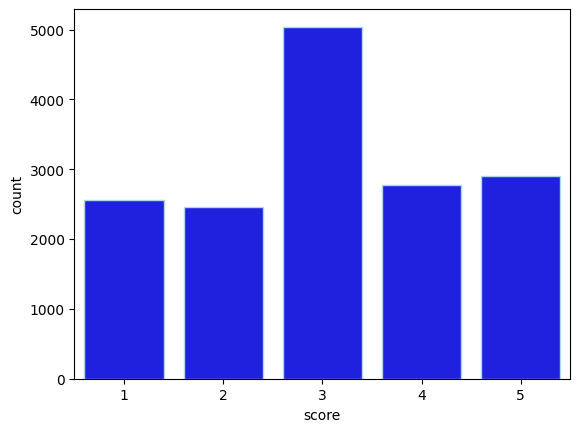

In [12]:
# Balanceo de los datos
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df.score, color='blue', edgecolor='lightblue')

El Dataset tiene organizadas las reseñas en categorias del 1 al 5, donde el 1 corresponde a la reseña mas desfavorable y el 5 a la reseña mas favorable. Se observa que el Dataset se encuentra desbalanceado, dado que las reseñas neutrales correspondientes al número 3 tienen aproximadamente el doble de votaciones que el resto de las categorias.

## Balanceo de clases del DataSet

Como una forma de resolver el desbalance observado en el punto anterior, se procede a realizar la sumarización de las categorias con votos de "1" y "2" en el grupo de reviews negativos ("negative"), las categorias con votos "4" y "5" en el grupo de reviews positivos ("positive") y el resto de los votos quedarían sumarizados como reviews neutrales.

In [13]:
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

El Dataset modificado queda con las siguientes categorias:

In [14]:
df.sentiment.value_counts()

,count
sentiment,
2,5676
1,5042
0,5028


En donde:

*   El valor de "0" corresponde a reseñas desfavorables (anteriormente 1 y 2)
*   El valor de "1" corresponde a reseñas neutrales (anteriormente 3)
*   El valor de "2" corresponde a reseñas favorables (anteriormente 4 y 5)



<ipython-input-15-aa743884bcd2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=df, palette=['green', 'white', 'darkorange'], edgecolor='black')


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

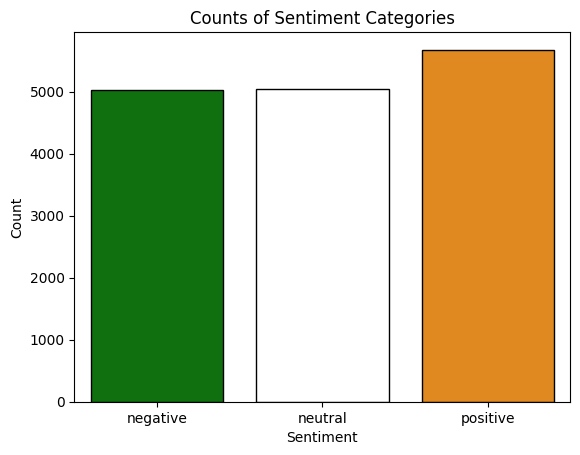

In [15]:
ax = sns.countplot(x='sentiment', data=df, palette=['green', 'white', 'darkorange'], edgecolor='black')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Review Sentiment')
plt.title('Counts of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
ax.set_xticklabels(class_names)

In [16]:
sentences = df['content'].values
print(f"Sentences shape: {sentences.shape}")
sentences[:3]

Sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


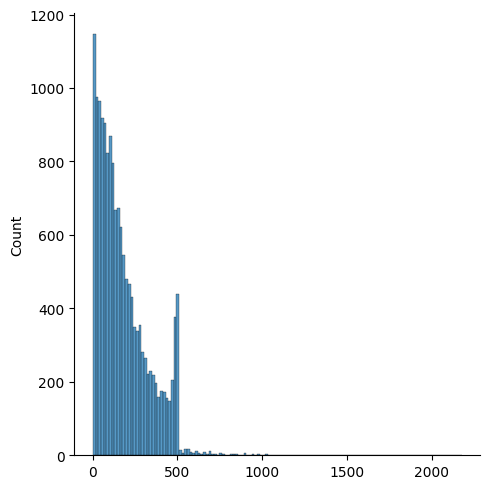

In [17]:
import numpy as np

sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

En el gráfico anterior, se observa la distribucion de la longitud en palabras de cada reseña.

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y = df['sentiment'].values
print(f"y shape: {y.shape}")
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print(f"output shape: {output_shape}")

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## Data Generator

Utilizamos el modelo base de BERT y su correspondiente Tokenizer.

In [20]:
from transformers import InputExample, InputFeatures
from transformers import BertTokenizer
import numpy as np

In [49]:
# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [22]:
# Del dataset original accederemos a los datos por índices (idx) mezclados aleatoriamente
from sklearn.model_selection import train_test_split

max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [23]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [24]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [25]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [26]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [27]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [28]:
y_test = y[idx_test]

## BERT Multiclass Classification

In [29]:
history1 = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 149s 420ms/step - loss: 1.1239 - accuracy: 0.3926 - f1_score: 0.3871 - val_loss: 1.0184 - val_accuracy: 0.4968 - val_f1_score: 0.4171
Epoch 2/5
315/315 [==============================] - 128s 405ms/step - loss: 1.0445 - accuracy: 0.4609 - f1_score: 0.4520 - val_loss: 0.9656 - val_accuracy: 0.5341 - val_f1_score: 0.4641
Epoch 3/5
315/315 [==============================] - 127s 405ms/step - loss: 0.9953 - accuracy: 0.4987 - f1_score: 0.4890 - val_loss: 0.9300 - val_accuracy: 0.5774 - val_f1_score: 0.5745
Epoch 4/5
315/315 [==============================] - 127s 404ms/step - loss: 0.9802 - accuracy: 0.5166 - f1_score: 0.5059 - val_loss: 0.9585 - val_accuracy: 0.5429 - val_f1_score: 0.4416
Epoch 5/5
315/315 [==============================] - 128s 407ms/step - loss: 0.9678 - accuracy: 0.5210 - f1_score: 0.5104 - val_loss: 0.9058 - val_accuracy: 0.5603 - val_f1_score: 0.5098


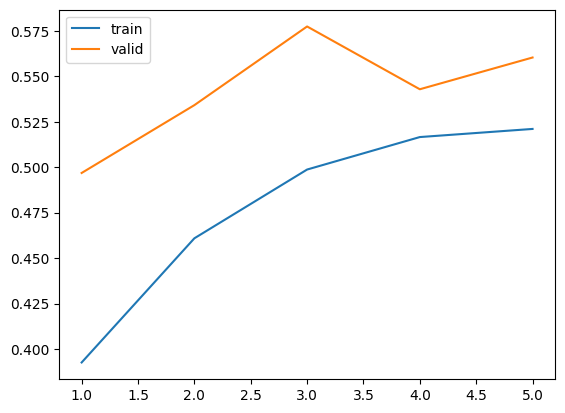

In [30]:
plot_train_metrics(history1)

In [31]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 33s 305ms/step


array([[0.49339482, 0.30869943, 0.19790573],
       [0.45872542, 0.25062022, 0.29065433],
       [0.22350143, 0.31869832, 0.4578003 ]], dtype=float32)

In [32]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [33]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 34s 310ms/step - loss: 0.9050 - accuracy: 0.5657 - f1_score: 0.5184


0.5657142996788025

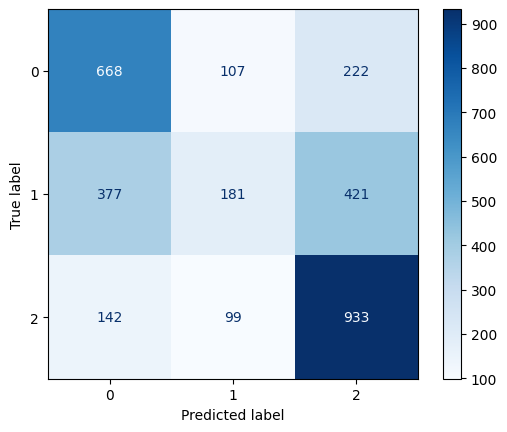

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Adjust display_labels to match the number of unique classes
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(cm.shape[0])))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## BERT Fine Tuning

Se realiza el procedimiento de Fine Tuning del modelo Bert.
Un detalle importante en este proceso es la forma en que se utiliza el optimizador:

Si bien en clase se utilizó el mismo optimizador "Adam", en clase este optimizador se instanció a partir de la libreria de Keras optimizers (keras.optimizers). Sin embargo, en el ejemplo de este Colab, vamos a utilizar el optimizador "Adam" de TensorFlow Keras (tensorflow.keras.optimizers).

Se eligió utilizar el otimizador de esta manera debido a que se observaron mejores resultados durante las pruebas realizadas.

In [35]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model2 = model

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces menor

model2.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [36]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 333s 946ms/step - loss: 0.7475 - accuracy: 0.6547 - val_loss: 0.6732 - val_accuracy: 0.6960
Epoch 2/5
315/315 [==============================] - 294s 935ms/step - loss: 0.6037 - accuracy: 0.7315 - val_loss: 0.6431 - val_accuracy: 0.7159
Epoch 3/5
315/315 [==============================] - 294s 933ms/step - loss: 0.4766 - accuracy: 0.7989 - val_loss: 0.6307 - val_accuracy: 0.7567
Epoch 4/5
315/315 [==============================] - 294s 934ms/step - loss: 0.3361 - accuracy: 0.8702 - val_loss: 0.6648 - val_accuracy: 0.7861
Epoch 5/5
315/315 [==============================] - 294s 933ms/step - loss: 0.2184 - accuracy: 0.9123 - val_loss: 0.7596 - val_accuracy: 0.7988


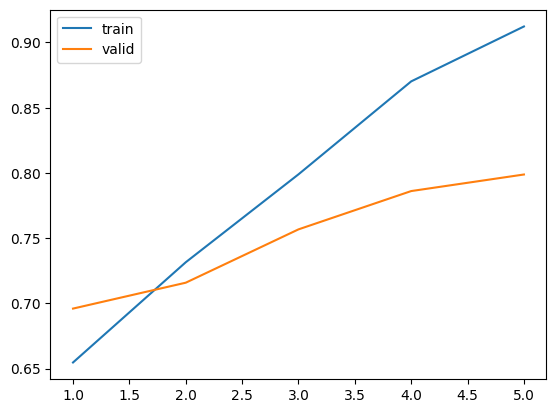

In [37]:
plot_train_metrics(history2)

In [38]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

99/99 [==============================] - 33s 307ms/step


array([[1.14431076e-01, 6.96946442e-01, 1.88622430e-01],
       [9.52970624e-01, 4.64978702e-02, 5.31427737e-04],
       [9.35107563e-03, 8.88763070e-01, 1.01885863e-01]], dtype=float32)

In [39]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [40]:
# Calcular la exactitud (accuracy)
scores = model2.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 34s 310ms/step - loss: 0.7305 - accuracy: 0.8073


0.8073015809059143

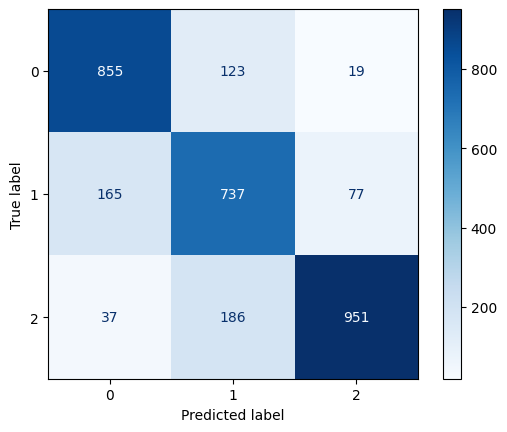

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(cm.shape[0])))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvamos el Modelo

Procedemos a salvar los pesos correspondientes al modelo entrenado.

In [42]:
model2.save_weights('bert_weights.h5')

In [43]:
# OPCIONAL!
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('bert_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Levantamos el Modelo

Procedemos a levantar el modelo entrenado.

In [44]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1]

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [45]:
model3.load_weights('bert_weights.h5')

## Testeamos el Modelo

Para testear el modelo, utilizamos un texto correspondiente a un review bastante desfavorable: "This app is terrible!"

In [46]:
text = "This app is terrible!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print(f"Inputs ids: {tf_batch['input_ids']}")
print(f"Attention mask: {tf_batch['attention_mask']}")

Inputs ids: [[  101  2023 10439  2003  6659   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]]
Attention mask: [[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [47]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [48]:
y_prob_ensayo = model3.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print(f"Clasificación: {class_names[int(y_prob)]}")

1/1 [==============================] - 3s 3s/step
Clasificación: negative


<ipython-input-48-c0acc460dfd2>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Clasificación: {class_names[int(y_prob)]}")


Se observa que después de evaluar el texto correspondiente a la reseña desfavorable, el modelo en efecto clasifica la reseña como negativa.

## Conclusiones

Luego de las pruebas realizadas con este laboratorio, se puede observar la efectividad del modelo Bert para el análisis multicategórico de sentimientos. Es interesante observar que el modelo puede tomar en cuenta reseñas que engloban muchas palabras y descripciones de los usuarios, así como tambien reseñas de unas pocas palabras.

Fue interesante observar en estos ensayos los probelmas de compatibilidad con la versión de la librería de Keras. Trabajando con la version más reciente de Keras, se observaron muchos problemas en el código el cual devolvía constantemente errores. Si bien estos errores podían resolverse sin cambiar mucho el código, el funcionamiento general del modelo nunca fue el mejor y esto se pudo observar en el hecho de que el modelo clasificaba todos las reseñas como neutrales.

Se pudo resolver todos los probelmas de compatibilidad y obtener los mejores resultados del modelo, haciendo un "downgrade" de la version de Keras a la version 2.15.0 y en correspondencia se requirió utilizar la version TensorFlow de Keras (tensorflow.keras) en todo momento.